In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

PROJECT_NAME = "GammaFest"
DATASET_PATH = "/content/drive/Shareddrives/GammaFest/Dataset"

In [ ]:
df_train = pd.read_csv(f"/content/drive/Shareddrives/BDC2022/GammaFest/Dataset/train.csv")
df_test = pd.read_csv(f"/content/drive/Shareddrives/BDC2022/GammaFest/Dataset/test.csv")
sample = pd.read_csv(f"/content/drive/Shareddrives/BDC2022/GammaFest/Dataset/sample_submission.csv")

In [ ]:
df_train.head()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,DC213,DC214,DC215,DC216,DC217,DC219,DC220,DC226,DC230a,DC230b,DC232,DC232b,DC235,DC237,DC237a,DC237b,DC237c,DC237d,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,35.0,36.0,31.0,1.0,1,2,80.0,8.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,Layak Minum
1,2,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,35.0,36.0,31.0,2.0,4,1,44.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,Layak Minum
2,3,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,35.0,36.0,31.0,2.0,2,1,35.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,Layak Minum
3,6,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,36.0,31.0,3.0,4,1,79.0,8.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,1.0,0.0,1.0,1,11.0,85.0,Layak Minum
4,7,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,35.0,36.0,31.0,2.0,3,2,37.0,8.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,Layak Minum


In [ ]:
df_test.head()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,DC213,DC214,DC215,DC216,DC217,DC219,DC220,DC226,DC230a,DC230b,DC232,DC232b,DC235,DC237,DC237a,DC237b,DC237c,DC237d,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a
0,26718,35,2,17,1,0,1,0,1,1,0,33,35,33,1,2,1,29,2,1,1,1,0,2,0,0,0,0,0,0,0,1,1,1,1,1,3,21,52
1,26802,35,1,12,1,1,1,1,0,1,0,35,35,33,1,2,1,42,2,1,1,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1,2,11,18
2,41302,74,2,12,1,0,1,1,1,1,0,35,36,31,2,4,1,46,2,1,1,1,0,3,0,0,0,0,0,0,0,1,0,0,1,4,5,11,78
3,38698,72,1,12,1,1,0,0,0,0,1,35,36,31,1,1,1,46,2,1,1,1,0,3,1,1,0,0,0,0,0,1,0,1,0,0,1,11,20
4,44257,76,2,12,1,0,1,0,0,1,0,35,23,31,3,4,1,47,2,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,1,1,3,11,125


In [ ]:
df_train.describe()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,DC213,DC214,DC215,DC216,DC217,DC219,DC220,DC226,DC230a,DC230b,DC232,DC232b,DC235,DC237,DC237a,DC237b,DC237c,DC237d,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a
count,35973.000000,35973.000000,35973.000000,35962.000000,35952.000000,35929.000000,35960.000000,35955.000000,35932.000000,35949.000000,35949.000000,35896.000000,35964.000000,35959.000000,35934.000000,35973.000000,35973.000000,35969.000000,35967.000000,35962.000000,32964.000000,32949.000000,32949.000000,25527.000000,35952.000000,35936.000000,35936.000000,35936.000000,35936.000000,35936.000000,35936.000000,35361.000000,30599.000000,35969.000000,35964.000000,35959.000000,35973.000000,35962.000000,35921.000000
mean,24336.069775,43.229088,1.468601,14.986736,0.960086,0.189234,0.846858,0.569434,0.326700,0.758547,0.132605,31.213729,34.142281,31.584137,2.323732,3.004976,1.156117,48.475660,5.312481,1.298315,0.975792,0.932987,0.006161,2.013006,0.687500,0.666045,0.008626,0.073687,0.019896,0.003451,0.198687,1.167303,0.826922,0.366288,0.379574,1.207014,2.699330,15.498637,82.668216
std,13828.886872,23.585684,0.499020,6.061058,0.195761,0.391700,0.360130,0.495162,0.469013,0.427970,0.339152,6.339326,4.322654,3.110804,1.105251,1.149772,0.362971,13.713263,11.973412,0.690939,0.153697,0.250048,0.078251,0.822909,0.486474,0.494219,0.174268,0.300126,0.203269,0.158921,0.425478,0.457907,0.378320,0.481796,0.485288,1.228101,1.435673,9.598043,91.194377
min,1.000000,11.000000,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,12.000000,12.000000,0.000000,0.000000,1.000000,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000
25%,12341.000000,31.000000,1.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,33.000000,35.000000,31.000000,2.000000,2.000000,1.000000,38.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,11.000000,42.000000
50%,24787.000000,35.000000,1.000000,12.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,33.000000,35.000000,31.000000,2.000000,4.000000,1.000000,48.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,11.000000,63.000000
75%,36131.000000,64.000000,2.000000,16.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,35.000000,35.000000,33.000000,3.000000,4.000000,1.000000,58.000000,8.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,12.000000,96.000000
max,47963.000000,94.000000,2.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,96.000000,96.000000,96.000000,20.000000,5.000000,2.000000,98.000000,95.000000,5.000000,1.000000,1.000000,1.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,6.000000,1.000000,1.000000,1.000000,4.000000,5.000000,96.000000,998.000000


In [ ]:
df_train.dtypes

id          int64
DC024       int64
DC025       int64
DC205     float64
DC206     float64
DC207     float64
DC208     float64
DC209     float64
DC210     float64
DC211     float64
DC212     float64
DC213     float64
DC214     float64
DC215     float64
DC216     float64
DC217       int64
DC219       int64
DC220     float64
DC226     float64
DC230a    float64
DC230b    float64
DC232     float64
DC232b    float64
DC235     float64
DC237     float64
DC237a    float64
DC237b    float64
DC237c    float64
DC237d    float64
DC237e    float64
DC237f    float64
DC241     float64
DC242     float64
DC244     float64
DC246     float64
DC252     float64
DC270a      int64
DC109     float64
DC142a    float64
DC201      object
dtype: object

In [ ]:
round(df_train.isnull().mean()*100,2)

id         0.00
DC024      0.00
DC025      0.00
DC205      0.03
DC206      0.06
DC207      0.12
DC208      0.04
DC209      0.05
DC210      0.11
DC211      0.07
DC212      0.07
DC213      0.21
DC214      0.03
DC215      0.04
DC216      0.11
DC217      0.00
DC219      0.00
DC220      0.01
DC226      0.02
DC230a     0.03
DC230b     8.36
DC232      8.41
DC232b     8.41
DC235     29.04
DC237      0.06
DC237a     0.10
DC237b     0.10
DC237c     0.10
DC237d     0.10
DC237e     0.10
DC237f     0.10
DC241      1.70
DC242     14.94
DC244      0.01
DC246      0.03
DC252      0.04
DC270a     0.00
DC109      0.03
DC142a     0.14
DC201      0.01
dtype: float64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35973 entries, 0 to 35972
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      35973 non-null  int64  
 1   DC024   35973 non-null  int64  
 2   DC025   35973 non-null  int64  
 3   DC205   35962 non-null  float64
 4   DC206   35952 non-null  float64
 5   DC207   35929 non-null  float64
 6   DC208   35960 non-null  float64
 7   DC209   35955 non-null  float64
 8   DC210   35932 non-null  float64
 9   DC211   35949 non-null  float64
 10  DC212   35949 non-null  float64
 11  DC213   35896 non-null  float64
 12  DC214   35964 non-null  float64
 13  DC215   35959 non-null  float64
 14  DC216   35934 non-null  float64
 15  DC217   35973 non-null  int64  
 16  DC219   35973 non-null  int64  
 17  DC220   35969 non-null  float64
 18  DC226   35967 non-null  float64
 19  DC230a  35962 non-null  float64
 20  DC230b  32964 non-null  float64
 21  DC232   32949 non-null  float64
 22

In [ ]:
for col in df_train:
  print(col, df_train[col].unique())

id [    1     2     3 ... 47961 47962 47963]
DC024 [11 12 13 14 15 16 17 18 19 21 31 32 33 34 35 36 51 52 53 61 62 63 64 65
 71 72 73 74 75 76 81 82 91 94]
DC025 [2 1]
DC205 [16. 31. 12. 21. 17. nan 96.]
DC206 [ 1.  0. nan]
DC207 [ 0.  1. nan]
DC208 [ 1.  0. nan]
DC209 [ 0.  1. nan]
DC210 [ 0.  1. nan]
DC211 [ 0.  1. nan]
DC212 [ 0.  1. nan]
DC213 [35. 11. 33. 21. 34. 36. 22. nan 32. 96. 31.]
DC214 [36. 35. 23. 32. 24. 31. 12. 34. 38. 22. 21. 26. 37. 96. nan 25.]
DC215 [31. 12. 32. 35. 33. 34. 21. 23. 22. nan 96. 13. 36.]
DC216 [ 1.  2.  3.  4. 10.  0.  5. nan  6.  7.  8. 20.  9. 12. 11. 14.]
DC217 [1 4 2 3 5 0]
DC219 [2 1]
DC220 [80. 44. 35. 79. 37. 36. 45. 69. 31. 57. 39. 22. 55. 62. 59. 53. 47. 66.
 42. 65. 61. 58. 41. 40. 38. 48. 63. 34. 43. 52. 72. 33. 49. 54. 73. 50.
 70. 51. 32. 71. 60. 77. 46. 67. 76. 29. 56. 30. 27. 78. 28. 86. 64. 75.
 83. 82. 68. 81. 23. 90. 74. 26. 21. 20. 25. 18. 89. 85. 87. 95. 84. 17.
 24. 16. 19. 92. nan 93. 88. 91. 15. 14. 94. 13. 98.]
DC226 [ 8.  2.  

In [ ]:
for col in df_train:
  if col == 'DC201':
    continue
  df_train[col] = df_train[col].astype('Int64')

In [ ]:
df_train['DC201'] = (df_train['DC201'] == 'Layak Minum').astype('int')

In [ ]:
df_train.head()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,DC213,DC214,DC215,DC216,DC217,DC219,DC220,DC226,DC230a,DC230b,DC232,DC232b,DC235,DC237,DC237a,DC237b,DC237c,DC237d,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1,11,2,16,1,0,1,0,0,0,0,35,36,31,1,1,2,80,8,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,2,1,12,60,1
1,2,11,2,31,1,0,1,0,0,1,0,35,36,31,2,4,1,44,2,1,1,1,0,1,1,1,0,0,0,0,0,1,0,1,1,1,2,31,70,1
2,3,11,2,12,1,0,1,1,1,1,0,35,36,31,2,2,1,35,2,1,1,1,0,1,1,1,0,0,0,0,0,1,0,1,1,0,4,11,75,1
3,6,11,2,12,1,0,0,0,0,1,0,35,36,31,3,4,1,79,8,1,1,1,0,1,1,1,0,0,0,0,0,2,<NA>,1,0,1,1,11,85,1
4,7,11,2,12,1,0,1,1,0,0,0,35,36,31,2,3,2,37,8,2,1,1,0,1,1,1,0,0,1,0,0,1,0,0,1,0,2,11,65,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35973 entries, 0 to 35972
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      35973 non-null  Int64
 1   DC024   35973 non-null  Int64
 2   DC025   35973 non-null  Int64
 3   DC205   35962 non-null  Int64
 4   DC206   35952 non-null  Int64
 5   DC207   35929 non-null  Int64
 6   DC208   35960 non-null  Int64
 7   DC209   35955 non-null  Int64
 8   DC210   35932 non-null  Int64
 9   DC211   35949 non-null  Int64
 10  DC212   35949 non-null  Int64
 11  DC213   35896 non-null  Int64
 12  DC214   35964 non-null  Int64
 13  DC215   35959 non-null  Int64
 14  DC216   35934 non-null  Int64
 15  DC217   35973 non-null  Int64
 16  DC219   35973 non-null  Int64
 17  DC220   35969 non-null  Int64
 18  DC226   35967 non-null  Int64
 19  DC230a  35962 non-null  Int64
 20  DC230b  32964 non-null  Int64
 21  DC232   32949 non-null  Int64
 22  DC232b  32949 non-null  Int64
 23  DC235   255

In [ ]:
for col in df_train:
  print(col, df_train[col].unique())

id <IntegerArray>
[    1,     2,     3,     6,     7,     9,    10,    13,    15,    18,
 ...
 47952, 47953, 47955, 47956, 47957, 47958, 47959, 47961, 47962, 47963]
Length: 35973, dtype: Int64
DC024 <IntegerArray>
[11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 31, 32, 33, 34, 35, 36, 51, 52, 53,
 61, 62, 63, 64, 65, 71, 72, 73, 74, 75, 76, 81, 82, 91, 94]
Length: 34, dtype: Int64
DC025 <IntegerArray>
[2, 1]
Length: 2, dtype: Int64
DC205 <IntegerArray>
[16, 31, 12, 21, 17, <NA>, 96]
Length: 7, dtype: Int64
DC206 <IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int64
DC207 <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64
DC208 <IntegerArray>
[1, 0, <NA>]
Length: 3, dtype: Int64
DC209 <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64
DC210 <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64
DC211 <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64
DC212 <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64
DC213 <IntegerArray>
[35, 11, 33, 21, 34, 36, 22, <NA>, 32, 96, 31]
Length: 11, dtype: In

In [ ]:
pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = df_train.sample(frac=1, random_state=42)
data_unseen = df_train.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))

Data for Modeling: (35973, 40)


In [ ]:
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Unseen Data For Predictions: (0, 40)


In [ ]:
from pycaret.classification import *

In [ ]:
latih = setup(data = data, target = 'DC201', session_id=42,
                  normalize = True,
                  transformation = True,
                  log_experiment = True,
                  #handle_unknown_categorical = True,
                  #unknown_categorical_method = 'most_frequent',
                  remove_multicollinearity = True, #rop one of the two features that are highly correlated with each other
                  #ignore_low_variance = True,#all categorical features with statistically insignificant variances are removed from the dataset.
                  #combine_rare_levels = True,# all levels in categorical features below the threshold defined in rare_level_threshold param are combined together as a single level
                  numeric_imputation='median',
           #ignore_features=['FKP02'],
            #date_features=['FKP03','FKP04'],
           fix_imbalance = True,
            train_size = 0.8
          )

,Description,Value
0,Session id,42
1,Target,DC201
2,Target type,Binary
3,Original data shape,"(35973, 40)"
4,Transformed data shape,"(59031, 37)"
5,Transformed train set shape,"(51836, 37)"
6,Transformed test set shape,"(7195, 37)"
7,Numeric features,39
8,Rows with missing values,47.6%
9,Preprocess,True


2023/05/13 09:16:27 INFO mlflow.tracking.fluent: Experiment with name 'clf-default-name' does not exist. Creating a new experiment.


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
compare_models(exclude = ['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm', 'gpc', 'rf', 'qda', 'ada', 'et', 'dummy'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9220,0.9080,0.9802,0.9362,0.9577,0.4620,0.4836,17.5790
catboost,CatBoost Classifier,0.9163,0.8997,0.9799,0.9309,0.9547,0.4062,0.4318,39.1350
lightgbm,Light Gradient Boosting Machine,0.9149,0.8995,0.9807,0.9288,0.9540,0.3856,0.4142,2.6070
gbc,Gradient Boosting Classifier,0.9032,0.8743,0.9652,0.9300,0.9473,0.3616,0.3714,20.9410
ridge,Ridge Classifier,0.7885,0.0000,0.7937,0.9653,0.8711,0.3118,0.3651,4.2390
lda,Linear Discriminant Analysis,0.7885,0.8490,0.7937,0.9653,0.8711,0.3118,0.3651,1.0030


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [ ]:
xgboost  = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9225,0.9204,0.9830,0.9344,0.9581,0.4521,0.4792
1,0.9180,0.9075,0.9757,0.9360,0.9554,0.4473,0.4630
2,0.9201,0.9043,0.9757,0.9381,0.9565,0.4674,0.4816
3,0.9194,0.8996,0.9780,0.9354,0.9562,0.4484,0.4672
4,0.9236,0.9128,0.9834,0.9351,0.9586,0.4605,0.4876
5,0.9246,0.9021,0.9850,0.9348,0.9592,0.4626,0.4927
6,0.9263,0.9082,0.9776,0.9427,0.9598,0.5162,0.5291
7,0.9263,0.8986,0.9842,0.9372,0.9601,0.4842,0.5104
8,0.9246,0.9158,0.9826,0.9367,0.9591,0.4751,0.4992


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9110,0.9180,0.9969,0.9124,0.9528,0.2071,0.3096
1,0.9121,0.9083,0.9985,0.9122,0.9534,0.2065,0.3227
2,0.9097,0.9016,0.9961,0.9117,0.9521,0.1947,0.2911
3,0.9100,0.8997,0.9965,0.9118,0.9523,0.1958,0.2952
4,0.9107,0.8975,0.9973,0.9118,0.9526,0.1980,0.3037
5,0.9110,0.9031,0.9977,0.9118,0.9528,0.1991,0.3082
6,0.9149,0.9125,0.9950,0.9175,0.9547,0.2787,0.3646
7,0.9170,0.8967,0.9977,0.9173,0.9558,0.2829,0.3863
8,0.9138,0.9084,0.9965,0.9153,0.9542,0.2505,0.3484


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


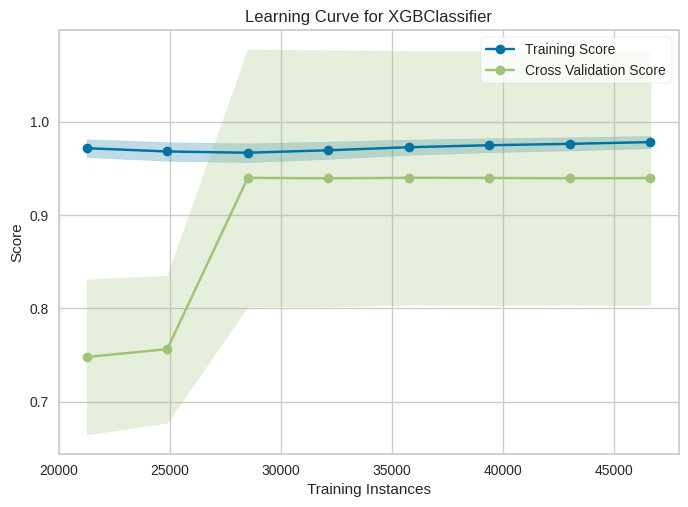

In [ ]:
plot_model(estimator = tuned_xgboost, plot = 'learning')

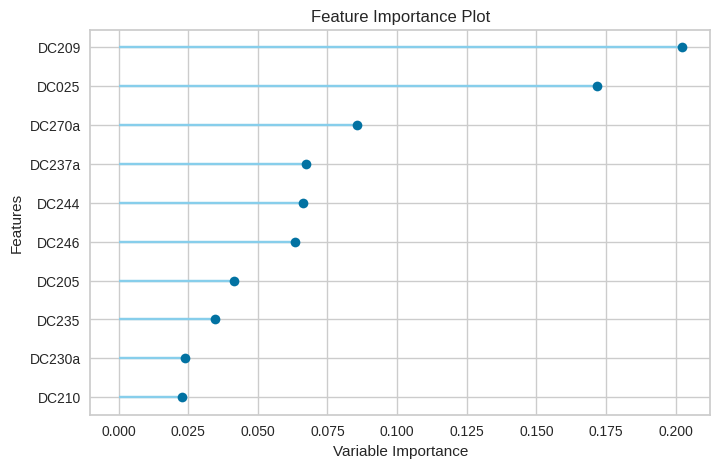

In [ ]:
plot_model(estimator = tuned_xgboost, plot = 'feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

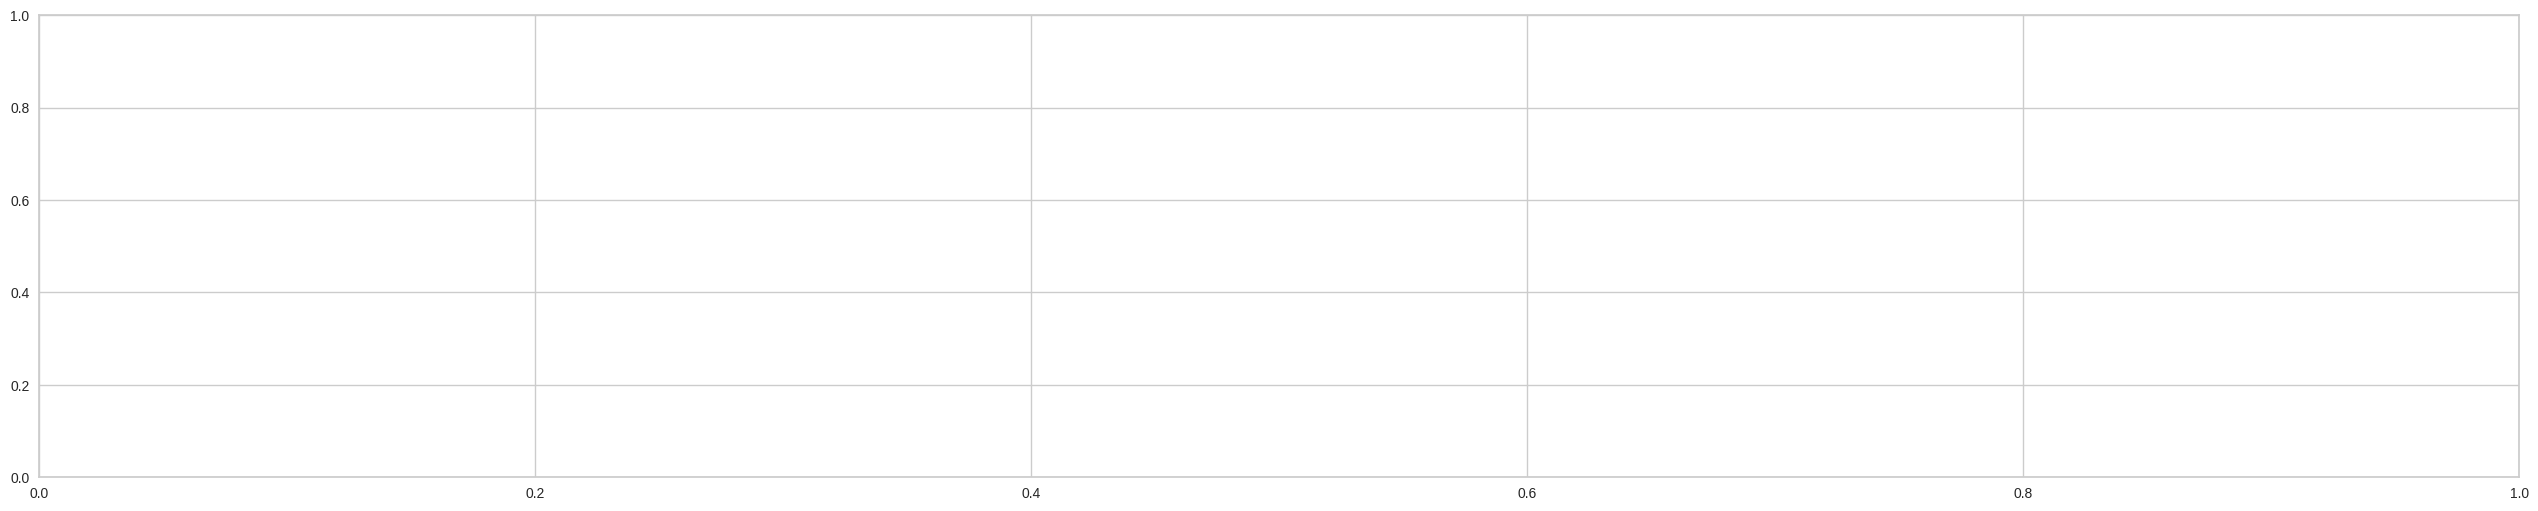

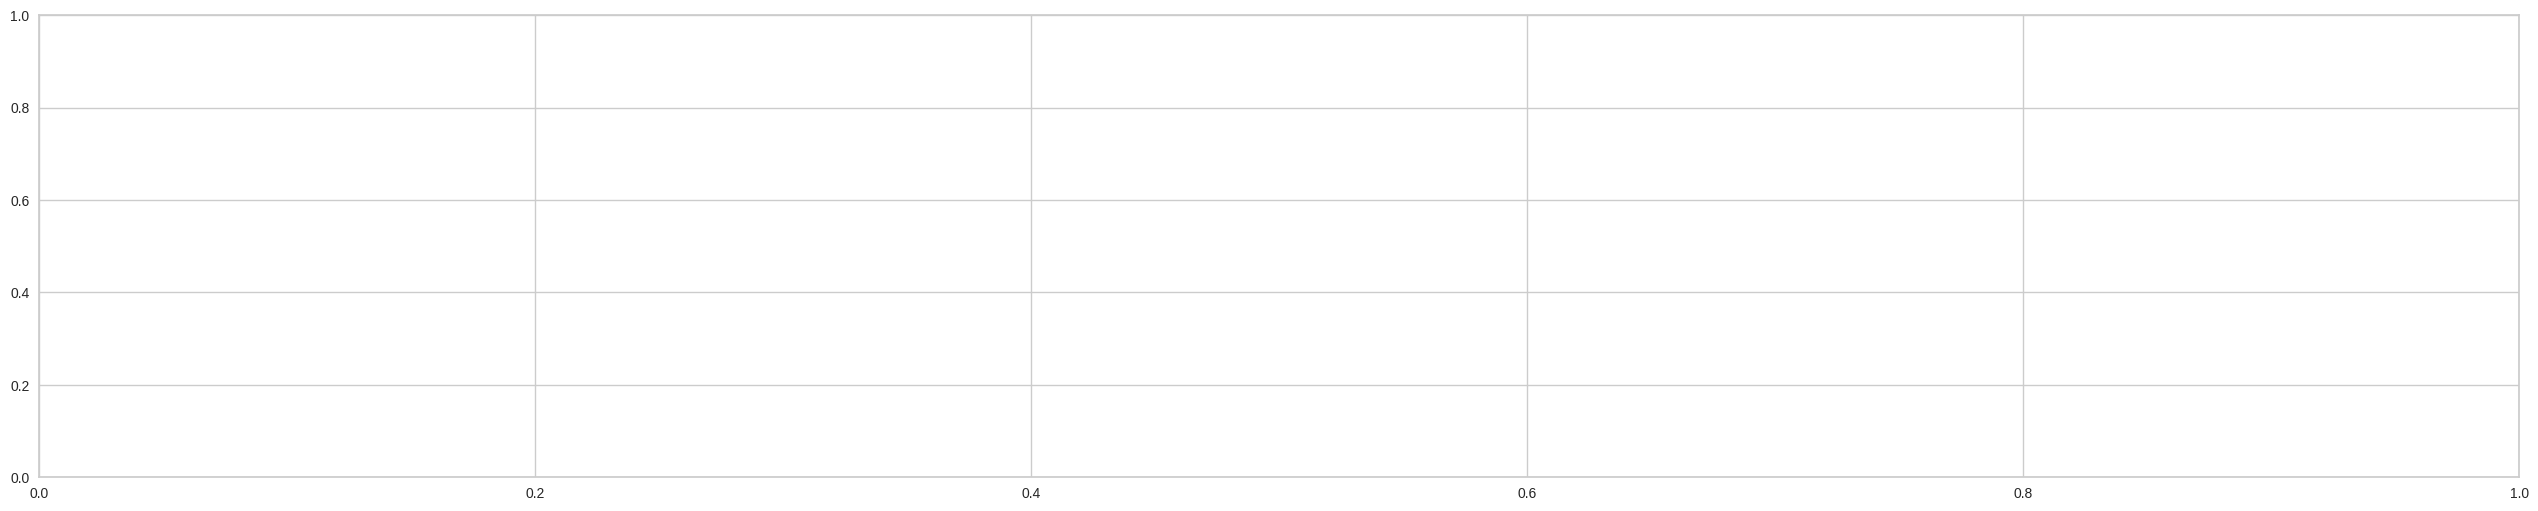

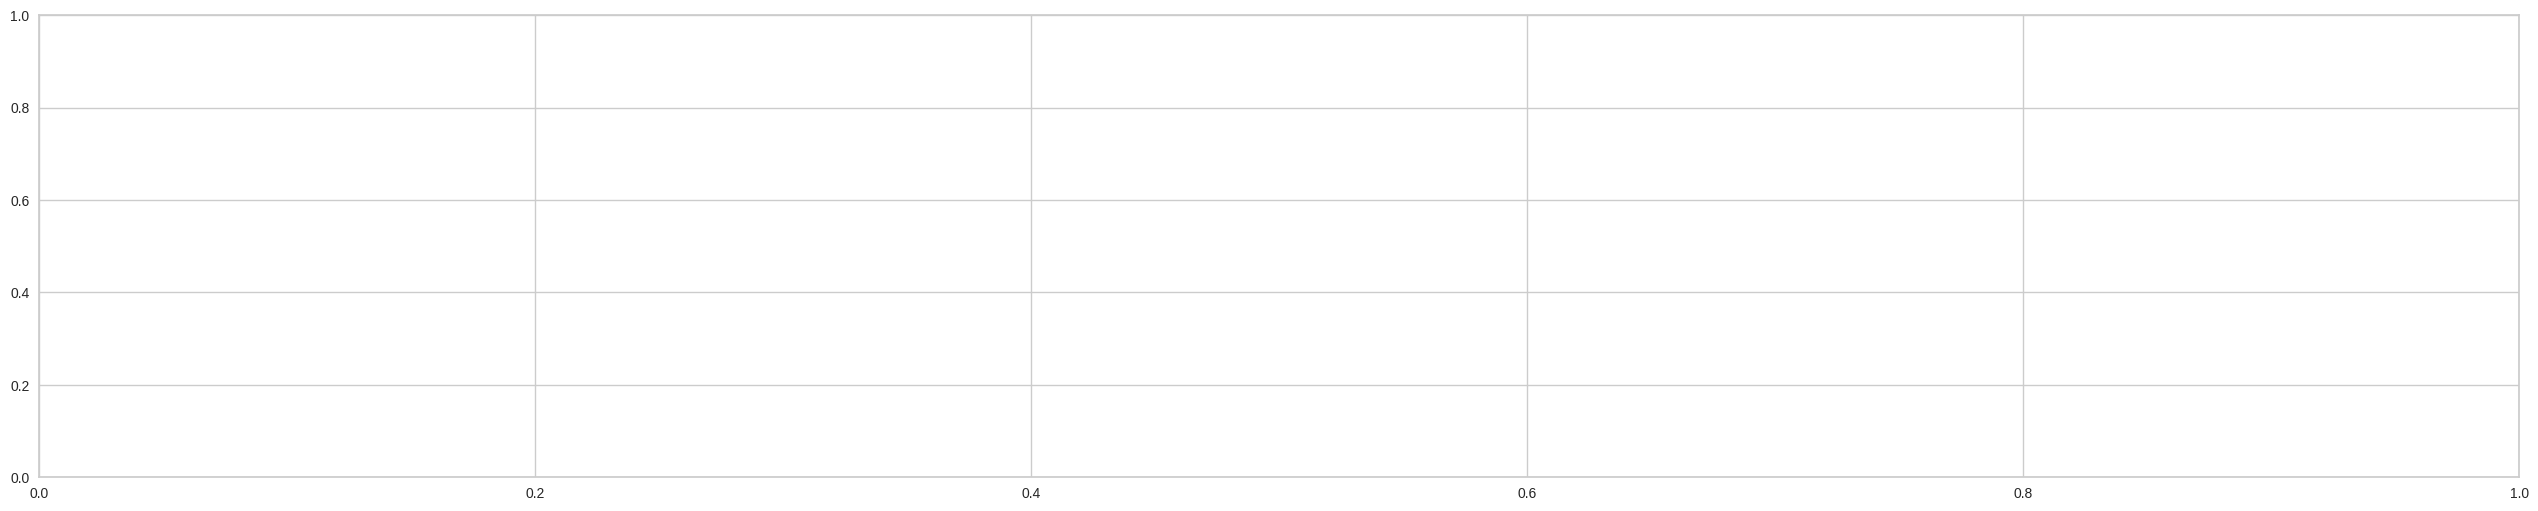

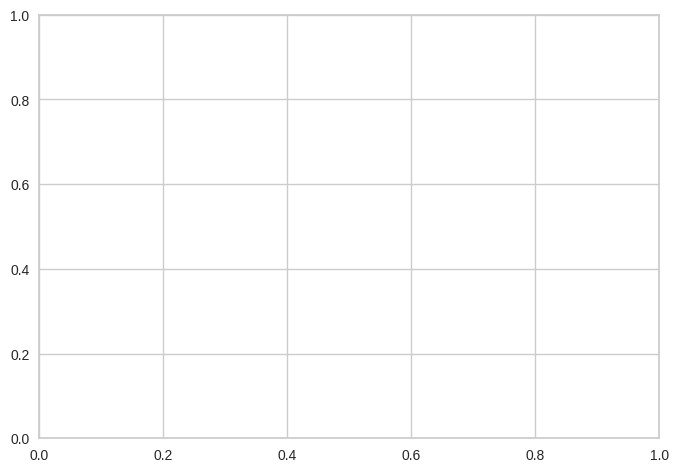

In [ ]:
evaluate_model(tuned_xgboost)

In [ ]:
predict_model(tuned_xgboost, data=df_test)

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,prediction_label,prediction_score
0,26718,35,2,17,1,0,1,0,1,1,...,1,1,1,1,1,3,21,52,1,0.9981
1,26802,35,1,12,1,1,1,1,0,1,...,1,1,0,0,1,2,11,18,1,0.9981
2,41302,74,2,12,1,0,1,1,1,1,...,1,0,0,1,4,5,11,78,1,0.9940
3,38698,72,1,12,1,1,0,0,0,0,...,1,0,1,0,0,1,11,20,1,0.9842
4,44257,76,2,12,1,0,1,0,0,1,...,1,1,1,1,1,3,11,125,1,0.8848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,36943,65,2,12,1,0,1,0,0,1,...,1,0,0,0,0,4,11,70,1,0.9553
11986,33415,61,2,12,1,0,1,1,0,1,...,1,1,1,0,0,4,11,120,1,0.9332
11987,41998,74,1,12,1,1,1,1,0,1,...,1,1,0,0,1,2,11,72,1,0.9936
11988,41567,74,2,31,0,0,0,0,0,1,...,1,0,0,1,1,1,51,9,1,0.8922


In [ ]:
preds = predict_model(tuned_xgboost, data=df_test)

In [ ]:
preds.head()

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,prediction_label,prediction_score
0,26718,35,2,17,1,0,1,0,1,1,...,1,1,1,1,1,3,21,52,1,0.9981
1,26802,35,1,12,1,1,1,1,0,1,...,1,1,0,0,1,2,11,18,1,0.9981
2,41302,74,2,12,1,0,1,1,1,1,...,1,0,0,1,4,5,11,78,1,0.9940
3,38698,72,1,12,1,1,0,0,0,0,...,1,0,1,0,0,1,11,20,1,0.9842
4,44257,76,2,12,1,0,1,0,0,1,...,1,1,1,1,1,3,11,125,1,0.8848


In [ ]:
sample.head()

,id,DC201
0,26718,NaN
1,26802,NaN
2,41302,NaN
3,38698,NaN
4,44257,NaN


In [ ]:
sample['DC201'] = round(preds['prediction_label']).astype(int)

In [ ]:
sample.head()

,id,DC201
0,26718,1
1,26802,1
2,41302,1
3,38698,1
4,44257,1


In [ ]:
sample['DC201'].value_counts()

1    11279
0      711
Name: DC201, dtype: int64

In [ ]:
sample['DC201'] = sample['DC201'].map({1:'Layak Minum', 0:'Tidak Layak Minum'})

In [ ]:
sample.head()

,id,DC201
0,26718,Layak Minum
1,26802,Layak Minum
2,41302,Layak Minum
3,38698,Layak Minum
4,44257,Layak Minum


In [ ]:
sample.to_csv('submission.csv',index=False)

In [ ]:
!head -n20 "submission.csv"

id,DC201
26718,Layak Minum
26802,Layak Minum
41302,Layak Minum
38698,Layak Minum
44257,Layak Minum
4087,Layak Minum
2543,Layak Minum
39565,Layak Minum
4871,Layak Minum
46131,Layak Minum
46160,Layak Minum
45834,Layak Minum
16872,Layak Minum
6716,Layak Minum
9512,Layak Minum
40285,Layak Minum
23031,Layak Minum
3743,Layak Minum
32354,Layak Minum


In [ ]:
sample["DC201"] = sample["DC201"].astype(str)

In [ ]:
sample.to_csv('submission1.csv',index=False)

In [ ]:
!head -n20 "submission1.csv"

id,DC201
26718,Layak Minum
26802,Layak Minum
41302,Layak Minum
38698,Layak Minum
44257,Layak Minum
4087,Layak Minum
2543,Layak Minum
39565,Layak Minum
4871,Layak Minum
46131,Layak Minum
46160,Layak Minum
45834,Layak Minum
16872,Layak Minum
6716,Layak Minum
9512,Layak Minum
40285,Layak Minum
23031,Layak Minum
3743,Layak Minum
32354,Layak Minum


In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11990 entries, 0 to 11989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11990 non-null  int64 
 1   DC201   11990 non-null  object
dtypes: int64(1), object(1)
memory usage: 187.5+ KB


In [ ]:
import csv

sample.to_csv('subs1.csv', quoting = csv.QUOTE_NONNUMERIC)

In [ ]:
!head -n20 "subs1.csv"

"","id","DC201"
0,26718,"Layak Minum"
1,26802,"Layak Minum"
2,41302,"Layak Minum"
3,38698,"Layak Minum"
4,44257,"Layak Minum"
5,4087,"Layak Minum"
6,2543,"Layak Minum"
7,39565,"Layak Minum"
8,4871,"Layak Minum"
9,46131,"Layak Minum"
10,46160,"Layak Minum"
11,45834,"Layak Minum"
12,16872,"Layak Minum"
13,6716,"Layak Minum"
14,9512,"Layak Minum"
15,40285,"Layak Minum"
16,23031,"Layak Minum"
17,3743,"Layak Minum"
18,32354,"Layak Minum"


In [ ]:
sample.head()

,id,DC201
0,26718,"""Layak Minum"""
1,26802,"""Layak Minum"""
2,41302,"""Layak Minum"""
3,38698,"""Layak Minum"""
4,44257,"""Layak Minum"""


In [ ]:
sample.to_csv('subss1.csv',index=False)

In [ ]:
!head -n20 "subss1.csv"

id,DC201
26718,"""Layak Minum"""
26802,"""Layak Minum"""
41302,"""Layak Minum"""
38698,"""Layak Minum"""
44257,"""Layak Minum"""
4087,"""Layak Minum"""
2543,"""Layak Minum"""
39565,"""Layak Minum"""
4871,"""Layak Minum"""
46131,"""Layak Minum"""
46160,"""Layak Minum"""
45834,"""Layak Minum"""
16872,"""Layak Minum"""
6716,"""Layak Minum"""
9512,"""Layak Minum"""
40285,"""Layak Minum"""
23031,"""Layak Minum"""
3743,"""Layak Minum"""
32354,"""Layak Minum"""


In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11990 entries, 0 to 11989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11990 non-null  int64 
 1   DC201   11990 non-null  object
dtypes: int64(1), object(1)
memory usage: 187.5+ KB


In [ ]:
sample["DC201"] = sample["DC201"].astype(str)

In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11990 entries, 0 to 11989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11990 non-null  int64 
 1   DC201   11990 non-null  object
dtypes: int64(1), object(1)
memory usage: 187.5+ KB


In [ ]:
sampley = sample.update(sample[['DC201']].astype(str))